<a href="https://colab.research.google.com/github/Molly-Abisage/WK9_KNN-and-NAIVE-BAYES-CLASSIFIERS/blob/main/K_NEAREST_NEIGHBOUR_CLASSIFIER_IP9_MollyAbisage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-NEAREST-NEIGHBOUR-CLASSIFIER

**1. Defining the Question**

a) Specifying the Data Analytic Question
Using Titanic data implement KNN classifier to create a model that would accurately classify whether a passenger would survive or not, given the different feaures from the data

**b) Defining the Metric for Success**

Randomly partition each dataset into two parts i.e 80 - 20 sets.

For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

Suggest and apply at least one of the optimization techniques that you learned earlier this week.

**c) Understanding the context**
Titanic was a passenger ship that sank in North Atlantic ocean in 1912 after striking an iceberg. It is reported that majority of the passengers died while a few of them survived.
As a Data Scientist, use the Titanic data to implement KNN classification by creating a model that would classify whether or not a passenger survived. Here is a description of the columns provided:

Survival — Survival 0 = No, 1 = Yes

Pclas — Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

Sex — Male or Female

Age — Age in years

Sibsp — the number of siblings and spouses travelling with the passenger

Parch — the number of parents and children travelling with the passenger

Ticket — Ticket number

Fare — Passenger fare

Cabin — Cabin number

Embarked — Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

**d) Recording the Experimental Design**


Reading and previewing the dataset

Data validation

Tidying up the data

EDA

Model perfomance optimization

Implementing the solution

Conclusion and challenging the solution

# LOADING AND CHECKING DATA

IMPORTING LIBRARIES

In [1]:
%matplotlib inline

#importing our necessary libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#LOADING TEST DATASET AND PREVIEWING HEAD and TAIL
test_df = pd.read_csv('/content/test (1).csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
#LOADING TRAIN DATASET AND PREVIEWING HEAD and TAIL
train_df = pd.read_csv('/content/train (5).csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Lets check shape
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [7]:
#checkin datatypes
print(train_df.dtypes)
print("************************")
print("************************")
print(test_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
************************
************************
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
#Checking  the columns
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Checking  the columns in train_df
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# DATA CLEANING

In [10]:
#check for null values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#check for null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#lets begin by dropping the cabin column since it has mostmissing values
train_df.drop('Cabin', axis = 1, inplace = True)

In [13]:
#lets deal with missing values
#defininf a function for mean of age

def fillnulls(dataframe_name, column_name,method):
    if method == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))

In [14]:
#lets fill in the null values in the Age column with the mean
fillnulls(train_df,'Age','mean')

In [15]:
# lets replace the missing values in the 'Embarked' column with its mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [16]:
#confirming we do not have null values in the columns we have worked on
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

the train_df is now clean

In [17]:
#check for missing values in the test dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#lets fill nulls in age column with the mean

fillnulls(test_df,'Age','mean')
fillnulls(test_df,'Fare','mean')

In [19]:
#since column-cabin has the high number of nulls we drop it

test_df.drop('Cabin', axis = 1, inplace = True)

In [20]:
#checking for duplicates in the data
print(train_df.duplicated().sum())
print("********")
test_df.duplicated().sum()


0
********


0

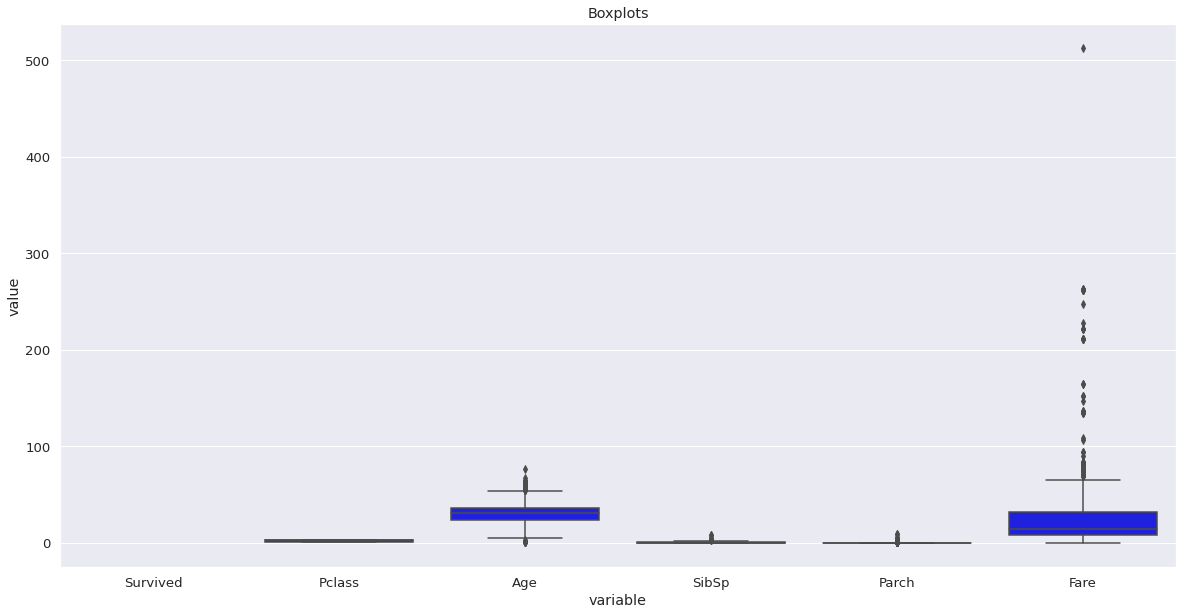

In [21]:
# Using boxplots to check for outliers

boxplot = pd.DataFrame(data = test_df, columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

plt.figure(figsize=(20,10))

sns.boxplot(x='variable', y='value', data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')

plt.show()

# EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [22]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
#lets check the dataset description on the Age column
## train dataset
print(train_df['Age'].describe())
print(train_df['Age'].mode())

# we observe that mean age = 29.699
# median = 29.699
# mode = 29.699

## test dataset

print(test_df['Age'].describe())
print(test_df['Age'].mode())

# we observe that mean age = 30.272
# median = 30.272
# mode = 30.27, 

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
0    29.699118
dtype: float64
count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64
0    30.27259
dtype: float64


Text(0.5, 0, 'survived')

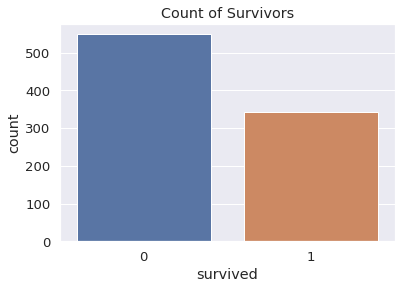

In [24]:
#lets start by checking the number of people who survived
#
sns.countplot(x='Survived', data = train_df)
plt.title('Count of Survivors')
plt.ylabel('count')
plt.xlabel('survived')

In [25]:
#lets check the actual numbers
train_df.Survived.value_counts()

##549 people died while 342 survived

0    549
1    342
Name: Survived, dtype: int64

In [26]:
#lets do splitting age into  age groups 
conditions = [
    ((train_df.Age >= 0) & (train_df.Age <= 9)),
    ((train_df.Age >= 10) & (train_df.Age <= 19)),
    ((train_df.Age >= 20) & (train_df.Age <= 29)),
    ((train_df.Age >= 30) & (train_df.Age <= 39)),
    ((train_df.Age >= 40) & (train_df.Age <= 49)),
    ((train_df.Age >= 50) & (train_df.Age <= 59)),
    ((train_df.Age >= 60) & (train_df.Age <= 69)),
    ((train_df.Age >= 70) & (train_df.Age <= 80))
]
choices = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8']
#create a column that stores our new data
train_df['age_range'] = np.select(conditions, choices)

Text(0, 0.5, 'Count')

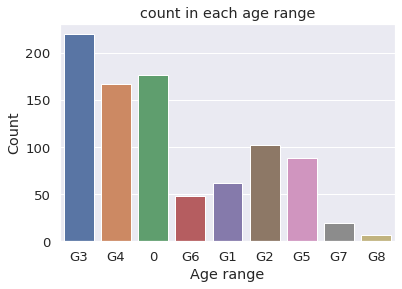

In [27]:
#check the count in the age range
sns.countplot(x='age_range',data = train_df)
plt.title('count in each age range')
plt.xlabel('Age range')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

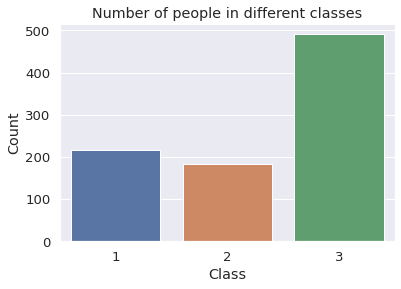

In [28]:
#lets check the distribution of people per class
sns.countplot(x='Pclass',data = train_df)
plt.title('Number of people in different classes')
plt.xlabel('Class')
plt.ylabel('Count')

BIVARIATE ANALYSIS

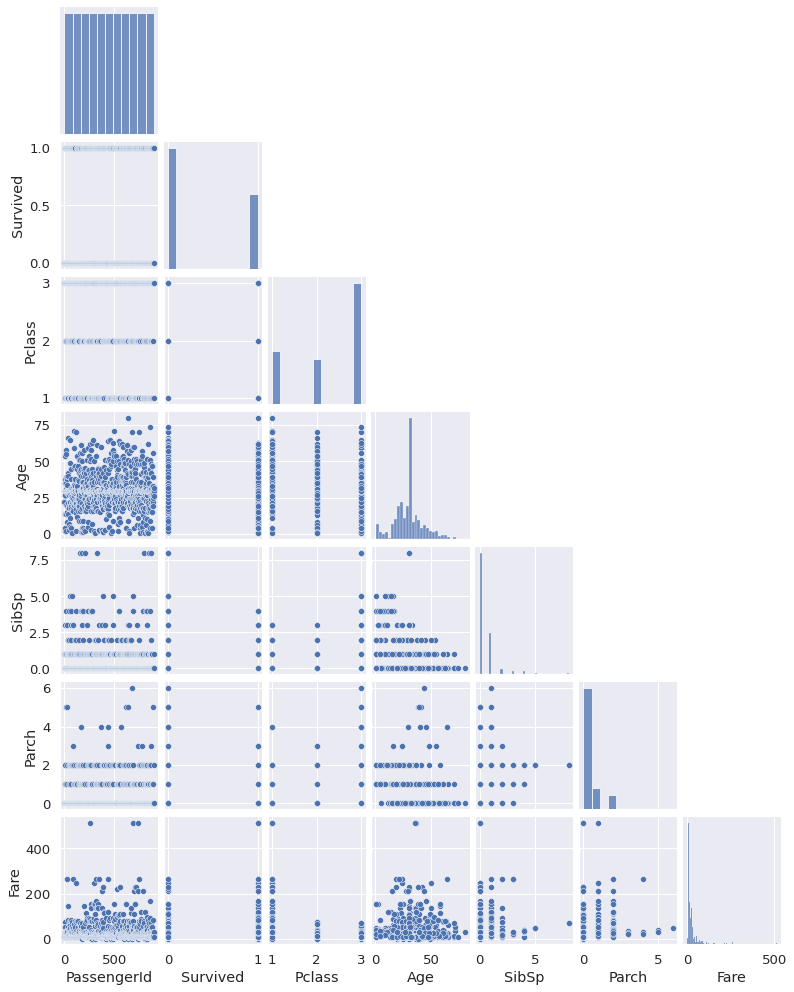

In [29]:
# Ploting the bivariate summaries
sns.pairplot(train_df, corner=True, aspect=0.8, height=2)

Text(0.5, 0, 'Pclass')

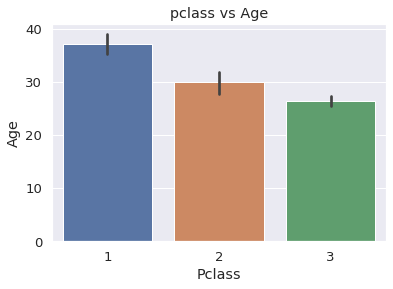

In [30]:
#we want to compare the class and age.
sns.barplot(x='Pclass',y='Age',data = train_df)
plt.title('pclass vs Age')
plt.ylabel('Age')
plt.xlabel('Pclass')

Text(0, 0.5, 'survived')

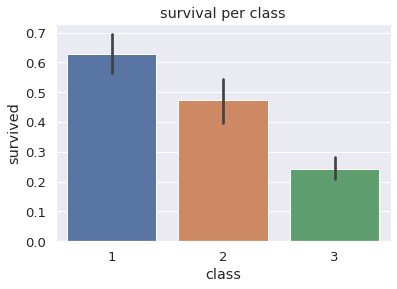

In [31]:
#Lets compare survival to class

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('survival per class')
plt.xlabel('class')
plt.ylabel('survived')

We observe that people in first class were more likely to survive compared to other classes. We also see that there was a higher population of people in the 3rd class compared to the other two classes

MULTIVARIATE ANALYSIS

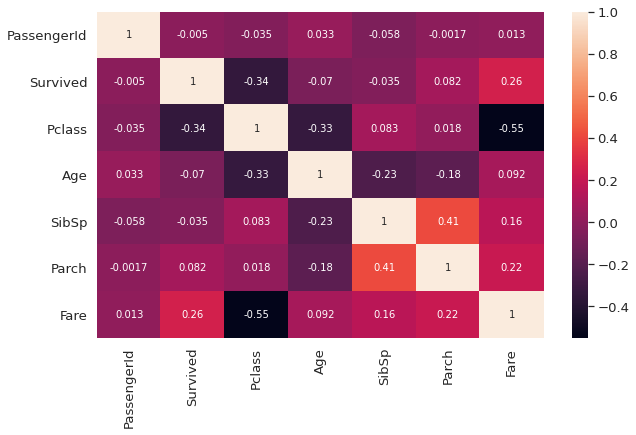

In [32]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, ax=ax);

In [33]:
corr = train_df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [34]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_range'],
      dtype='object')

In [35]:
# Dropping name column

train_df = train_df.drop(columns=['Name'])

train_df.sample(n=7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
99,100,0,2,male,34.0,1,0,244367,26.0000,S,G4
705,706,0,2,male,39.0,0,0,250655,26.0000,S,G4
361,362,0,2,male,29.0,1,0,SC/PARIS 2167,27.7208,C,G3
824,825,0,3,male,2.0,4,1,3101295,39.6875,S,G1
622,623,1,3,male,20.0,1,1,2653,15.7417,C,G3
6,7,0,1,male,54.0,0,0,17463,51.8625,S,G6
204,205,1,3,male,18.0,0,0,A/5 3540,8.0500,S,G2


# MODELLING

**K-NEAREST NEIGHBOUR CLASSIFIER**

In [36]:
# converting sex and embarked to categorical datatypes

train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')

In [45]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Ticket'] = le.fit_transform(train_df['Ticket'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
0,1,0,3,1,22.0,1,0,523,7.2500,2,G3
1,2,1,1,0,38.0,1,0,596,71.2833,0,G4
2,3,1,3,0,26.0,0,0,669,7.9250,2,G3
3,4,1,1,0,35.0,1,0,49,53.1000,2,G4
4,5,0,3,1,35.0,0,0,472,8.0500,2,G4


In [46]:
#we need to split i.e independent and dependent variable

my_cols = ['Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

X = train_df[my_cols].values
y = train_df['Survived']

In [47]:
#we first partition our data 80-20, we get the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Feature Scaling
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
#training our data and making predictions 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
#Lets make predictions on the dataset
y_pred = classifier.predict(X_test)

In [51]:
# we assess the perfomance of our matrix using a confusing matrix, we can also check the classification report.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91 19]
 [25 44]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       110
           1       0.70      0.64      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [52]:
from sklearn import metrics
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7541899441340782


our model accuracy is 75.41%, our model is doing good.


USING 70% AND 30%

In [58]:
#we now use 70% training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
# perform standard scaling on our data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
# We now make predictions  
y_pred = classifier.predict(X_test)

In [62]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[136  32]
 [ 45  55]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       168
           1       0.63      0.55      0.59       100

    accuracy                           0.71       268
   macro avg       0.69      0.68      0.68       268
weighted avg       0.71      0.71      0.71       268



In [63]:
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7126865671641791


our model accuracy dropped to 71.12%. Our model is doing good

The number of wrongly labeled elements have dropped too.

USING 60%TRAINING DATA AND 40% TEST DATA

In [65]:
#we now use 60% training data and 40% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [66]:
# perform standard scaling on our data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
# We now make predictions  
y_pred = classifier.predict(X_test)

In [69]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182  39]
 [ 65  71]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       221
           1       0.65      0.52      0.58       136

    accuracy                           0.71       357
   macro avg       0.69      0.67      0.68       357
weighted avg       0.70      0.71      0.70       357



In [70]:
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7086834733893558


Our model accuracy is going down the more we increase the test data and reduce the train data. more elements from the our confusion matrix have been wrongly labelled. we want to make our model better.

**Optimization of KNN using Dimensionality Reduction with Linear Discriminant Analysis**

In [79]:
# perfoming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter


In [80]:
# Defining the training and tests sets with an 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Peforming LDA

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored